# Hotel_Demand_Prediction

In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)

In [425]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [427]:
df.describe(percentiles=(0.01,0.1,0.25,0.5,0.75,0.9,0.99)).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.0,0.0,0.00,0.000,1.0,1.0,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,0.0,3.0,18.00,69.000,160.0,265.0,444.00,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2015.0,2015.0,2016.00,2016.000,2017.0,2017.0,2017.00,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,2.0,8.0,16.00,28.000,38.0,46.0,53.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,1.0,4.0,8.00,16.000,23.0,28.0,31.00,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.0,0.0,0.00,1.000,2.0,2.0,4.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,0.0,1.0,1.00,2.000,3.0,5.0,10.00,50.0
adults,119390.0,1.856403,0.579261,0.00,1.0,1.0,2.00,2.000,2.0,2.0,3.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.0,0.0,0.00,0.000,0.0,0.0,2.00,10.0
babies,119390.0,0.007949,0.097436,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.00,10.0


In [428]:
X=df.drop(['is_canceled'],axis=1)
y=df[['is_canceled']]

In [429]:
X_num=X.select_dtypes('number')
X_char=X.select_dtypes('object')

In [430]:
def unique_values(X):
    X=X.value_counts().count()
    return(X)
X_num_value_counts=pd.DataFrame(X_num.apply(lambda x: unique_values(x)),columns=['Value_counts'])
X_num_value_counts

,Value_counts
lead_time,479
arrival_date_year,3
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14
children,5
babies,5
is_repeated_guest,2


In [431]:
X_cat=X_num[X_num_value_counts[X_num_value_counts['Value_counts']<=20].index]
X_cat.head()

,arrival_date_year,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests
0,2015,0,2,0.0,0,0,0,0,0
1,2015,0,2,0.0,0,0,0,0,0
2,2015,0,1,0.0,0,0,0,0,0
3,2015,0,1,0.0,0,0,0,0,0
4,2015,0,2,0.0,0,0,0,0,1


In [432]:
X_cat.shape

(119390, 9)

In [433]:
X_num=X_num[X_num_value_counts[X_num_value_counts['Value_counts']>20].index]
X_num.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
0,342,27,1,0,0,3,NaN,NaN,0,0.0
1,737,27,1,0,0,4,NaN,NaN,0,0.0
2,7,27,1,1,0,0,NaN,NaN,0,75.0
3,13,27,1,1,0,0,304.0,NaN,0,75.0
4,14,27,1,2,0,0,240.0,NaN,0,98.0


In [434]:
X_num.shape

(119390, 10)

In [435]:
X_char=pd.concat([X_cat,X_char],axis=1)
X_char.shape

(119390, 22)

In [436]:
X_num.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
lead_time,119390.0,104.011416,106.863097,0.00,0.0,3.0,18.00,69.000,160.0,265.0,444.00,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,2.0,8.0,16.00,28.000,38.0,46.0,53.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,1.0,4.0,8.00,16.000,23.0,28.0,31.00,31.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,0.0,1.0,1.00,2.000,3.0,5.0,10.00,50.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.0,0.0,0.00,0.000,0.0,0.0,3.00,72.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.0,0.0,0.00,0.000,0.0,1.0,3.00,21.0
agent,103050.0,86.693382,110.774548,1.00,1.0,6.0,9.00,14.000,229.0,241.0,390.00,535.0
company,6797.0,189.266735,131.655015,6.00,16.0,40.0,62.00,179.000,270.0,390.4,513.04,543.0
days_in_waiting_list,119390.0,2.321149,17.594721,0.00,0.0,0.0,0.00,0.000,0.0,0.0,75.00,391.0
adr,119390.0,101.831122,50.535790,-6.38,0.0,50.0,69.29,94.575,126.0,164.0,252.00,5400.0


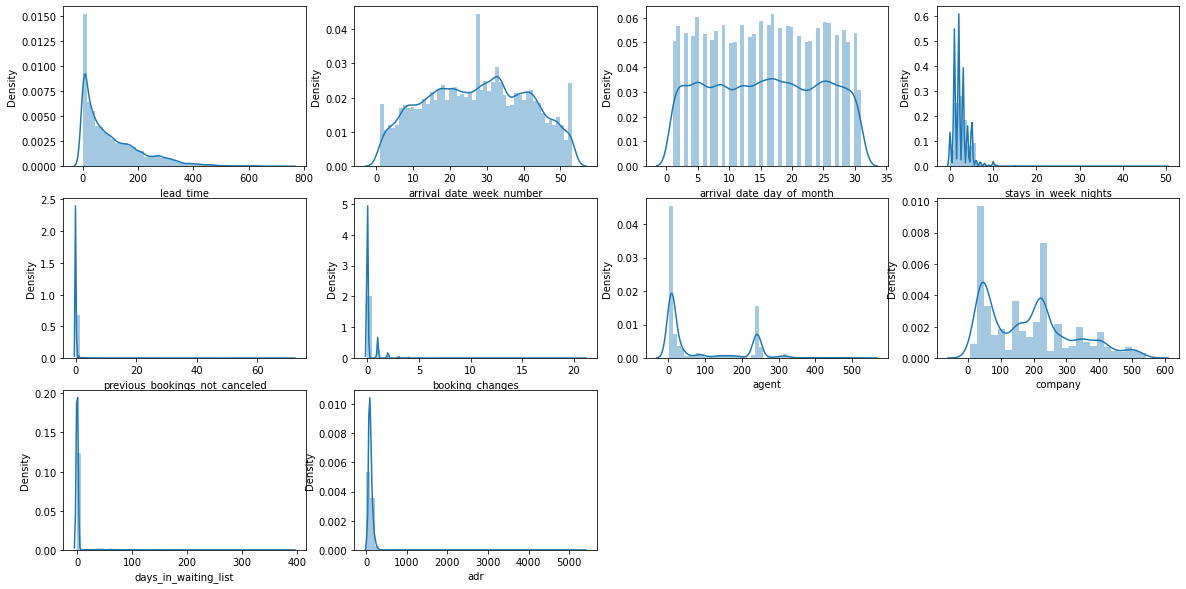

In [437]:
plt.figure(figsize=(20,10))
for i,var in enumerate(X_num.columns,1):
    plt.subplot(3,4,i)
    sns.distplot(X_num[var])

In [438]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)
X_num=X_num.apply(lambda x: outlier_cap(x))
X_num.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
lead_time,119390.0,103.409180,104.600923,0.0,0.0,3.0,18.00,69.000,160.0,265.0,444.0000,444.00
arrival_date_week_number,119390.0,27.173943,13.588582,2.0,2.0,8.0,16.00,28.000,38.0,46.0,53.0000,53.00
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.0,1.0,4.0,8.00,16.000,23.0,28.0,31.0000,31.00
stays_in_week_nights,119390.0,2.479211,1.761267,0.0,0.0,1.0,1.00,2.000,3.0,5.0,10.0000,10.00
previous_bookings_not_canceled,119390.0,0.060273,0.376351,0.0,0.0,0.0,0.00,0.000,0.0,0.0,3.0000,3.00
booking_changes,119390.0,0.209574,0.555245,0.0,0.0,0.0,0.00,0.000,0.0,1.0,3.0000,3.00
agent,103050.0,86.008598,108.591334,1.0,1.0,6.0,9.00,14.000,229.0,241.0,390.0000,390.00
company,6797.0,189.206373,131.297172,16.0,16.0,40.0,62.00,179.000,270.0,390.4,513.0016,513.04
days_in_waiting_list,119390.0,1.606902,9.760268,0.0,0.0,0.0,0.00,0.000,0.0,0.0,75.0000,75.00
adr,119390.0,101.461251,46.905036,0.0,0.0,50.0,69.29,94.575,126.0,164.0,252.0000,252.00


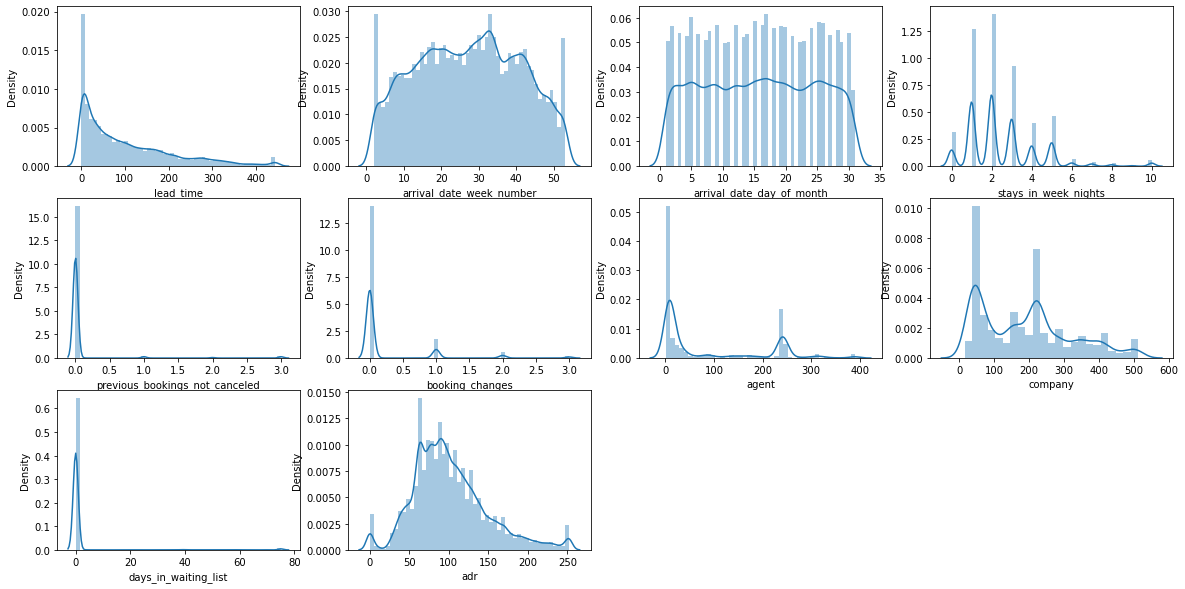

In [439]:
plt.figure(figsize=(20,10))
for i,var in enumerate(X_num.columns,1):
    plt.subplot(3,4,i)
    sns.distplot(X_num[var])

In [440]:
pd.DataFrame(X_num.isnull().mean()*100,columns=['% of missing values'])

,% of missing values
lead_time,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_week_nights,0.000000
previous_bookings_not_canceled,0.000000
booking_changes,0.000000
agent,13.686238
company,94.306893
days_in_waiting_list,0.000000
adr,0.000000


In [441]:
pd.DataFrame(X_char.isnull().mean()*100,columns=['% of missing values'])

,% of missing values
arrival_date_year,0.000000
stays_in_weekend_nights,0.000000
adults,0.000000
children,0.003350
babies,0.000000
is_repeated_guest,0.000000
previous_cancellations,0.000000
required_car_parking_spaces,0.000000
total_of_special_requests,0.000000
hotel,0.000000


In [442]:
X_num=X_num.loc[:,(X_num.isnull().mean()<0.25)]
X_num.shape

(119390, 9)

In [443]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X_num=pd.DataFrame(imputer.fit_transform(X_num),index=X_num.index,columns=X_num.columns)
X_num.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,342.0,27.0,1.0,0.0,0.0,3.0,86.008598,0.0,0.0
1,444.0,27.0,1.0,0.0,0.0,3.0,86.008598,0.0,0.0
2,7.0,27.0,1.0,1.0,0.0,0.0,86.008598,0.0,75.0
3,13.0,27.0,1.0,1.0,0.0,0.0,304.000000,0.0,75.0
4,14.0,27.0,1.0,2.0,0.0,0.0,240.000000,0.0,98.0


In [444]:
pd.DataFrame(X_num.isnull().mean()*100,columns=['% of missing values'])

,% of missing values
lead_time,0.0
arrival_date_week_number,0.0
arrival_date_day_of_month,0.0
stays_in_week_nights,0.0
previous_bookings_not_canceled,0.0
booking_changes,0.0
agent,0.0
days_in_waiting_list,0.0
adr,0.0


In [445]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X_char=pd.DataFrame(imputer.fit_transform(X_char),index=X_char.index,columns=X_char.columns)
X_char.head()

,arrival_date_year,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests,hotel,arrival_month_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,2015,0,2,0,0,0,0,0,0,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
1,2015,0,2,0,0,0,0,0,0,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
2,2015,0,1,0,0,0,0,0,0,Resort Hotel,July 2015,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02-07-2015
3,2015,0,1,0,0,0,0,0,0,Resort Hotel,July 2015,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,02-07-2015
4,2015,0,2,0,0,0,0,0,1,Resort Hotel,July 2015,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,03-07-2015


In [446]:
pd.DataFrame(X_char.isnull().mean()*100,columns=['% of missing values'])

,% of missing values
arrival_date_year,0.0
stays_in_weekend_nights,0.0
adults,0.0
children,0.0
babies,0.0
is_repeated_guest,0.0
previous_cancellations,0.0
required_car_parking_spaces,0.0
total_of_special_requests,0.0
hotel,0.0


In [447]:
from sklearn.feature_selection import VarianceThreshold
varselect=VarianceThreshold(threshold=0)
varselect.fit_transform(X_num)
cols=varselect.get_support(indices=True)
X_num=X_num.iloc[:,cols]
X_num.iloc[0]

lead_time                         342.000000
arrival_date_week_number           27.000000
arrival_date_day_of_month           1.000000
stays_in_week_nights                0.000000
previous_bookings_not_canceled      0.000000
booking_changes                     3.000000
agent                              86.008598
days_in_waiting_list                0.000000
adr                                 0.000000
Name: 0, dtype: float64

In [448]:
X_num.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,342.0,27.0,1.0,0.0,0.0,3.0,86.008598,0.0,0.0
1,444.0,27.0,1.0,0.0,0.0,3.0,86.008598,0.0,0.0
2,7.0,27.0,1.0,1.0,0.0,0.0,86.008598,0.0,75.0
3,13.0,27.0,1.0,1.0,0.0,0.0,304.000000,0.0,75.0
4,14.0,27.0,1.0,2.0,0.0,0.0,240.000000,0.0,98.0


In [449]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
X_num_bin=pd.DataFrame(discrete.fit_transform(X_num),index=X_num.index,columns=X_num.columns)
X_num_bin.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,9.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
1,9.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
2,1.0,4.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0
3,2.0,4.0,0.0,1.0,0.0,0.0,5.0,0.0,3.0
4,2.0,4.0,0.0,2.0,0.0,0.0,5.0,0.0,5.0


In [450]:
X_num_bin

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,9.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
1,9.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
2,1.0,4.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0
3,2.0,4.0,0.0,1.0,0.0,0.0,5.0,0.0,3.0
4,2.0,4.0,0.0,2.0,0.0,0.0,5.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
119385,2.0,6.0,9.0,5.0,0.0,0.0,5.0,0.0,5.0
119386,6.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,9.0
119387,3.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0
119388,6.0,6.0,9.0,5.0,0.0,0.0,4.0,0.0,5.0


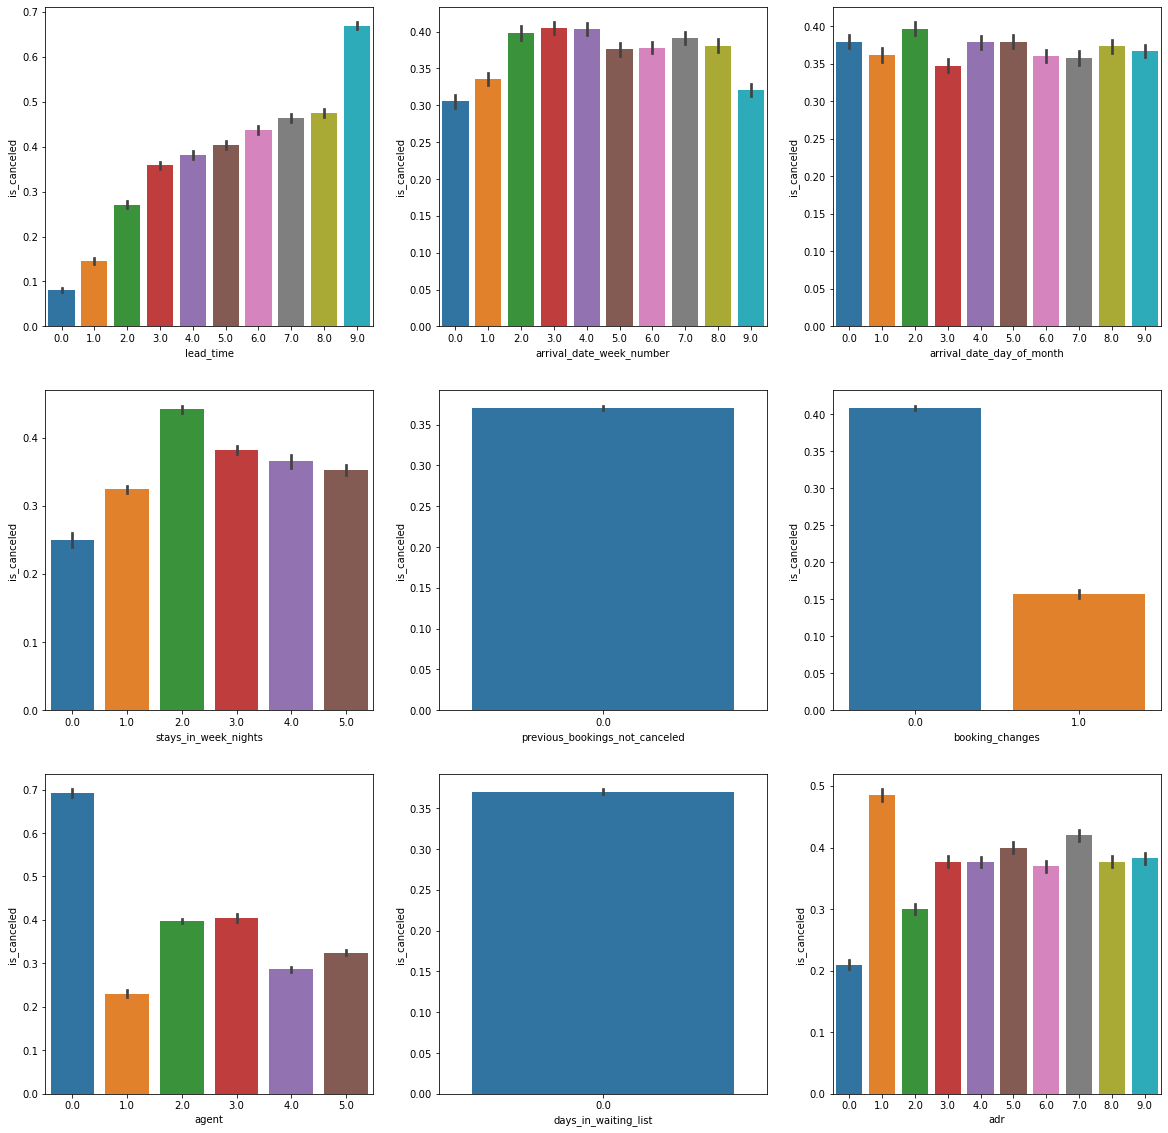

In [451]:
X_num_bin=pd.concat([X_num_bin,y],axis=1)
plt.figure(figsize=(20,20))
for i,var in enumerate(X_num_bin.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.barplot(x=var,y=X_num_bin['is_canceled'],data=X_num_bin)

In [452]:
X_num['booking_changes_ind']=np.where(X_num['booking_changes']>0,1,0)
X_num['previous_bookings_not_canceled_ind']=np.where(X_num['previous_bookings_not_canceled']>0,1,0)
X_num['booking_changes_ind']=np.where(X_num['booking_changes']>0,1,0)
X_num=X_num.drop(['arrival_date_week_number','arrival_date_day_of_month','previous_bookings_not_canceled','days_in_waiting_list'],axis=1)
X_num.head()

,lead_time,stays_in_week_nights,booking_changes,agent,adr,booking_changes_ind,previous_bookings_not_canceled_ind
0,342.0,0.0,3.0,86.008598,0.0,1,0
1,444.0,0.0,3.0,86.008598,0.0,1,0
2,7.0,1.0,0.0,86.008598,75.0,0,0
3,13.0,1.0,0.0,304.000000,75.0,0,0
4,14.0,2.0,0.0,240.000000,98.0,0,0


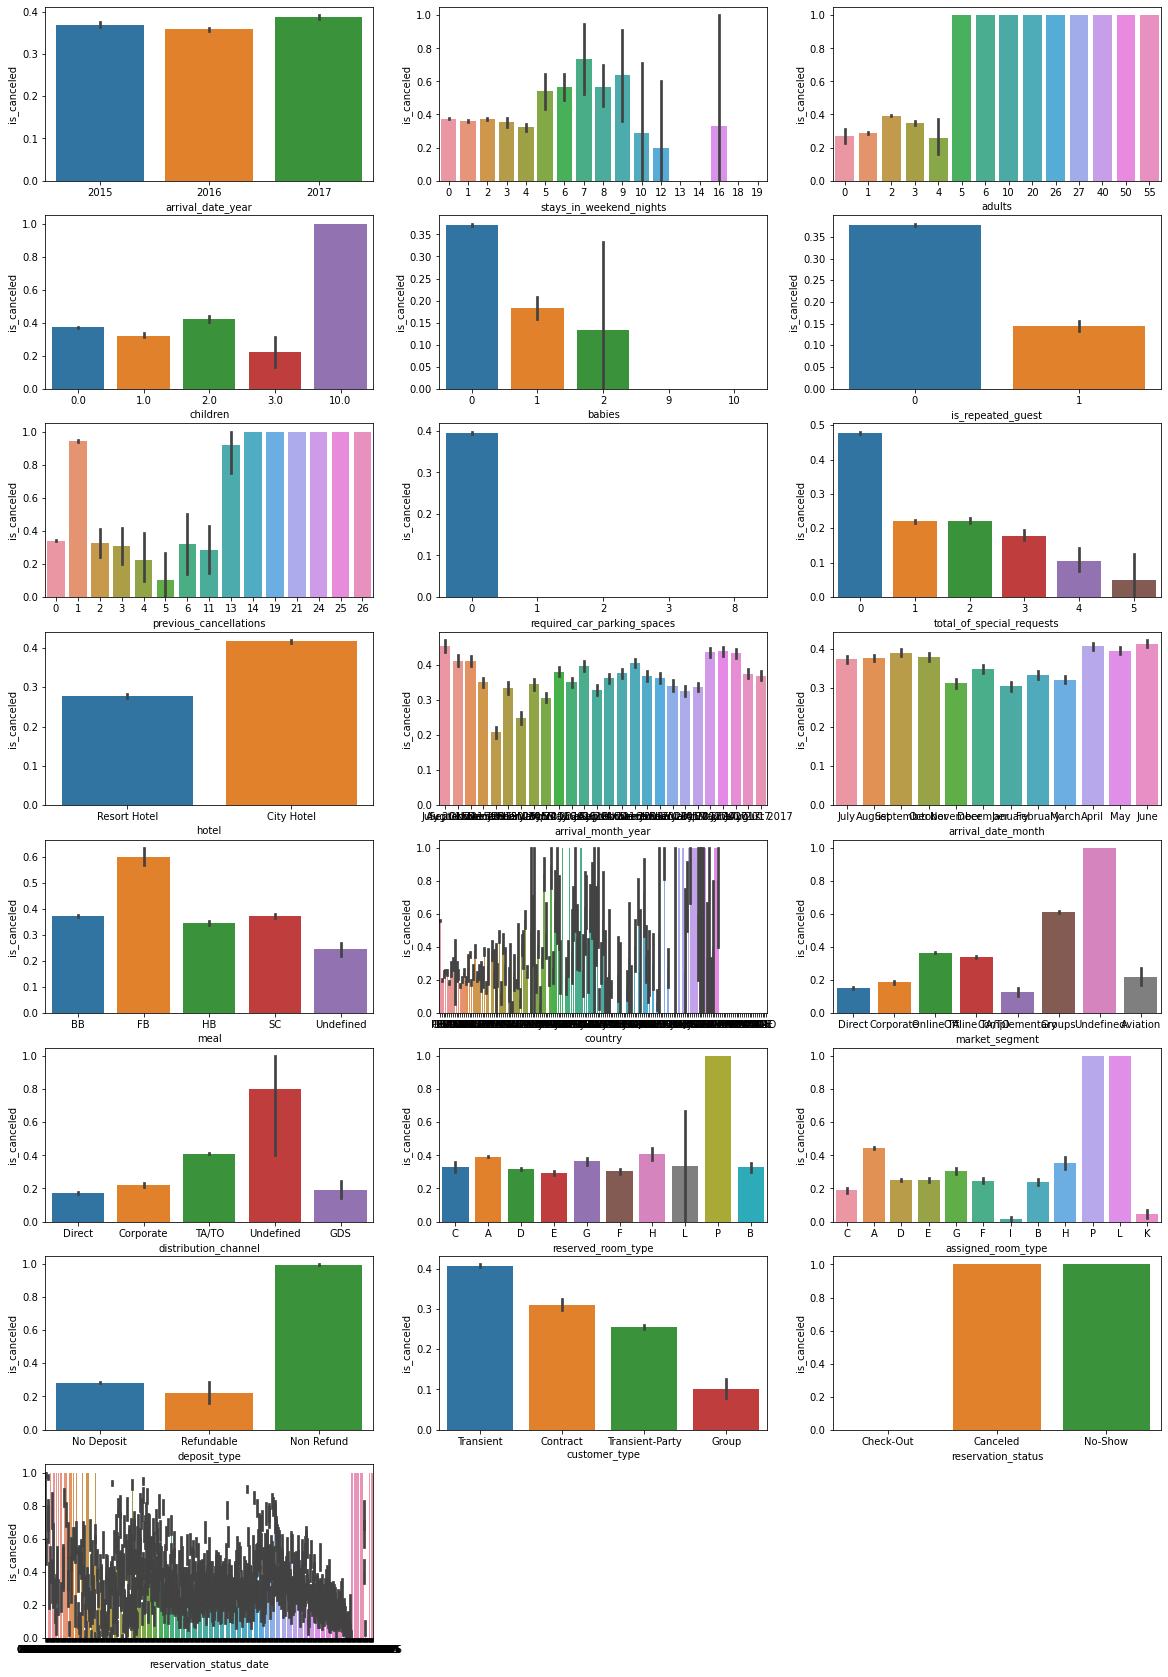

In [453]:
X_char_bin=pd.concat([X_char,y],axis=1)
plt.figure(figsize=(20,30))
for i,var in enumerate(X_char_bin.columns[:-1],1):
    plt.subplot(8,3,i)
    sns.barplot(x=X_char_bin[var],y=X_char_bin['is_canceled'])

In [454]:
X_char=X_char.drop(['arrival_date_month','country','assigned_room_type','reservation_status',
          'reservation_status_date','arrival_date_year'],axis=1)
X_char.head()

,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests,hotel,arrival_month_year,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,0,2,0,0,0,0,0,0,Resort Hotel,July 2015,BB,Direct,Direct,C,No Deposit,Transient
1,0,2,0,0,0,0,0,0,Resort Hotel,July 2015,BB,Direct,Direct,C,No Deposit,Transient
2,0,1,0,0,0,0,0,0,Resort Hotel,July 2015,BB,Direct,Direct,A,No Deposit,Transient
3,0,1,0,0,0,0,0,0,Resort Hotel,July 2015,BB,Corporate,Corporate,A,No Deposit,Transient
4,0,2,0,0,0,0,0,1,Resort Hotel,July 2015,BB,Online TA,TA/TO,A,No Deposit,Transient


In [455]:
X_char.shape

(119390, 16)

In [456]:
X_char_dum=pd.get_dummies(X_char,drop_first=True)
X_char_dum.head()

,stays_in_weekend_nights_1,stays_in_weekend_nights_2,stays_in_weekend_nights_3,stays_in_weekend_nights_4,stays_in_weekend_nights_5,stays_in_weekend_nights_6,stays_in_weekend_nights_7,stays_in_weekend_nights_8,stays_in_weekend_nights_9,stays_in_weekend_nights_10,stays_in_weekend_nights_12,stays_in_weekend_nights_13,stays_in_weekend_nights_14,stays_in_weekend_nights_16,stays_in_weekend_nights_18,stays_in_weekend_nights_19,adults_1,adults_2,adults_3,adults_4,adults_5,adults_6,adults_10,adults_20,adults_26,adults_27,adults_40,adults_50,adults_55,children_1.0,children_2.0,children_3.0,children_10.0,babies_1,babies_2,babies_9,babies_10,is_repeated_guest_1,previous_cancellations_1,previous_cancellations_2,previous_cancellations_3,previous_cancellations_4,previous_cancellations_5,previous_cancellations_6,previous_cancellations_11,previous_cancellations_13,previous_cancellations_14,previous_cancellations_19,previous_cancellations_21,previous_cancellations_24,previous_cancellations_25,previous_cancellations_26,required_car_parking_spaces_1,required_car_parking_spaces_2,required_car_parking_spaces_3,required_car_parking_spaces_8,total_of_special_requests_1,total_of_special_requests_2,total_of_special_requests_3,total_of_special_requests_4,total_of_special_requests_5,hotel_Resort Hotel,arrival_month_year_April 2017,arrival_month_year_August 2015,arrival_month_year_August 2016,arrival_month_year_August 2017,arrival_month_year_December 2015,arrival_month_year_December 2016,arrival_month_year_February 2016,arrival_month_year_February 2017,arrival_month_year_January 2016,arrival_month_year_January 2017,arrival_month_year_July 2015,arrival_month_year_July 2016,arrival_month_year_July 2017,arrival_month_year_June 2016,arrival_month_year_June 2017,arrival_month_year_March 2016,arrival_month_year_March 2017,arrival_month_year_May 2016,arrival_month_year_May 2017,arrival_month_year_November 2015,arrival_month_year_November 2016,arrival_month_year_October 2015,arrival_month_year_October 2016,arrival_month_year_September 2015,arrival_month_year_September 2016,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [457]:
from sklearn.feature_selection import SelectKBest, chi2
select=SelectKBest(chi2,50)
select.fit_transform(X_char_dum,y)
cols=select.get_support(indices=True)
X_char=X_char_dum.iloc[:,cols]
X_char.shape

(119390, 50)

In [458]:
X=pd.concat([X_num,X_char],axis=1)
X.shape

(119390, 57)

In [459]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=13)

In [460]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (89542, 57)
Shape of Testing Data (29848, 57)
Response Rate in Training Data is_canceled    0.37101
dtype: float64
Response Rate in Testing Data is_canceled    0.368634
dtype: float64


In [461]:
X.columns

Index(['lead_time', 'stays_in_week_nights', 'booking_changes', 'agent', 'adr',
       'booking_changes_ind', 'previous_bookings_not_canceled_ind',
       'stays_in_weekend_nights_6', 'adults_1', 'adults_2', 'children_1.0',
       'children_2.0', 'babies_1', 'is_repeated_guest_1',
       'previous_cancellations_1', 'previous_cancellations_14',
       'previous_cancellations_19', 'previous_cancellations_24',
       'previous_cancellations_25', 'previous_cancellations_26',
       'required_car_parking_spaces_1', 'total_of_special_requests_1',
       'total_of_special_requests_2', 'total_of_special_requests_3',
       'total_of_special_requests_4', 'hotel_Resort Hotel',
       'arrival_month_year_April 2017', 'arrival_month_year_August 2015',
       'arrival_month_year_February 2017', 'arrival_month_year_January 2016',
       'arrival_month_year_July 2015', 'arrival_month_year_July 2016',
       'arrival_month_year_June 2017', 'arrival_month_year_March 2016',
       'arrival_month_year_Mar

In [462]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],
       'max_depth':[50,100,150,200,500],
        'criterion':['gini','entropy'],
        'max_depth':[10,20,50,75,100],
       'min_samples_leaf':[10,20,50,75,100]}
grid_DT=GridSearchCV(DecisionTreeClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_DT.fit(X_train,y_train)
print(grid_DT.best_score_)
print(grid_DT.best_estimator_)
DT_clf=grid_DT.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.0min finished


0.722765742123672
DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=10)


In [463]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def results(clf,X_train,y_train,X_test,y_test):
    print('========================================================================')
    print('Train data result summary')
    print('========================================================================')
    y_pred=clf.predict(X_train)
    score=accuracy_score(y_train,y_pred)
    c_matrix=confusion_matrix(y_train,y_pred)
    c_report=classification_report(y_train,y_pred,output_dict=True)
    print('Accuracy score : ')
    print(score)
    print('Confusion matrix : ')
    display(pd.DataFrame(c_matrix))
    print('Classification report : ')
    display(pd.DataFrame(c_report))
    
    print('\n========================================================================')
    print('Test data result summary')
    print('========================================================================')
    y_pred1=clf.predict(X_test)
    score=accuracy_score(y_test,y_pred1)
    c_matrix=confusion_matrix(y_test,y_pred1)
    c_report=classification_report(y_test,y_pred1,output_dict=True)
    print('Accuracy score : ')
    print(score)
    print('Confusion matrix : ')
    display(pd.DataFrame(c_matrix))
    print('Classification report : ')
    display(pd.DataFrame(c_report))

In [464]:
results(DT_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.8801344620401599
Confusion matrix : 


,0,1
0,52364,3957
1,6776,26445


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.885424,0.869844,0.880134,0.877634,0.879644
recall,0.929742,0.796033,0.880134,0.862887,0.880134
f1-score,0.907042,0.831303,0.880134,0.869173,0.878942
support,56321.000000,33221.000000,0.880134,89542.000000,89542.000000



Test data result summary
Accuracy score : 
0.8292682926829268
Confusion matrix : 


,0,1
0,16729,2116
1,2980,8023


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.848800,0.791301,0.829268,0.820050,0.827604
recall,0.887716,0.729165,0.829268,0.808440,0.829268
f1-score,0.867822,0.758963,0.829268,0.813392,0.827693
support,18845.000000,11003.000000,0.829268,29848.000000,29848.000000


Accuracy: 0.8292682926829268
Precision 0.7913009172502219
Recall 0.7291647732436608
f1_score 0.7589632012108599


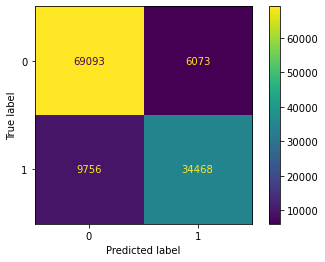

In [471]:
from sklearn import metrics
y_pred=DT_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))
metrics.plot_confusion_matrix(DT_clf,X,y)

In [467]:
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=9,min_samples_split=140)
rf.fit(X_train,y_train)
results(rf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.774206517611847
Confusion matrix : 


,0,1
0,56102,219
1,19999,13222


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.737205,0.983707,0.774207,0.860456,0.828659
recall,0.996112,0.398001,0.774207,0.697056,0.774207
f1-score,0.847321,0.566714,0.774207,0.707018,0.743213
support,56321.000000,33221.000000,0.774207,89542.000000,89542.000000



Test data result summary
Accuracy score : 
0.7765344411685875
Confusion matrix : 


,0,1
0,18762,83
1,6587,4416


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.740148,0.981551,0.776534,0.860849,0.829137
recall,0.995596,0.401345,0.776534,0.698470,0.776534
f1-score,0.849075,0.569733,0.776534,0.709404,0.746100
support,18845.000000,11003.000000,0.776534,29848.000000,29848.000000


Accuracy: 0.7765344411685875
Precision 0.9815514558790842
Recall 0.40134508770335364
f1_score 0.56973293768546


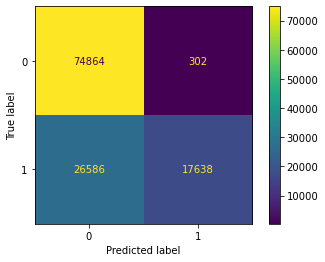

In [470]:
from sklearn import metrics
y_pred=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))
metrics.plot_confusion_matrix(rf,X,y)